# Group Project: Eigenpictures

### Katie Bibby (s1731437), Andrea Lhotská (s1612804), Teresa Matamoro Zatarain (s1719611), Yanyu Zhou (s2032537)

In this project, we visualise linear maps using "eigenpictures". We compute the four basic tasks and then investigate eigenpictures further.

## Task 1: Basic eigenpicture

Suppose that we are working with some matrix $A$. The first step in producing the complete eigenpicture of $A$ is to start with the basic eigenpicture. This is a collection of unit vectors $\vec{v_i}$ pointing out from the origin, and pointing out from each of these vectors is the vector $A\vec{v_i}$. Our function `basic_eigenpicture` produces this basic eigenpicture.

In [1]:
from sage.plot.arrow import CurveArrow
from sage.plot.colors import rainbow

def basic_eigenpicture(A):
    unit = sum([arrow2d((0,0), (cos(x),sin(x)), color = Color(hue(x/(2*pi), 1, 1)).lighter(1/2), width=1, thickness=0, zorder=1, arrowsize=3, aspect_ratio=1) for x in [0..2*pi,step=0.157]])
    linear_map = sum([arrow2d((cos(x),sin(x)), (A+ matrix.identity(2))*vector((cos(x),sin(x))), color = Color(hue(x/(2*pi), 1, 1)), width=1, thickness=0, zorder=1, arrowsize=3, aspect_ratio=1) for x in [0..2*pi,step=0.157]])
    return unit + linear_map

Let us now test our function on the $2 \times 2$ matrix $A=\begin{pmatrix}
2 & 1 \\
0 & 1 
\end{pmatrix}$.

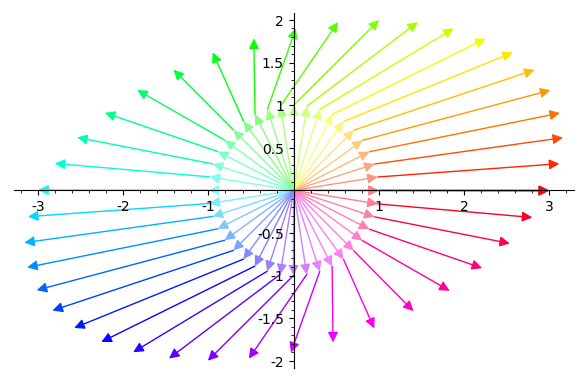

In [2]:
A = Matrix(ZZ, 2, 2, [2, 1, 0, 1])
basic_eigenpicture(A)

## Task 2: Displaying the Eigenvectors

The next step in obtaining the complete eigenpicture is to find and plot the normalised eigenvectors of $A$. Let us call them $\vec{e_1}$ and $\vec{e_2}$. Pointing out from each of the $\vec{e_i}$ we can then plot the vectors $A\vec{e_i}$. This is implemented using our function `show_eigenvectors` as defined below. The function considers two cases: when algebraic multiplicity of eigenvectors is one (the first if loop) and when multiplicity is two (the second if loop).

In [3]:
def show_eigenvectors(A):
    my_plot = plot([])
    if A.eigenvectors_right()[0][2]==1 :
        n = len(A.eigenvectors_right())
        for i in range(0,n):
            ev = A.eigenvectors_right()[i][1][0]
            nev = ev.normalized()
            if ev in RR^2:
                arrow1 = arrow2d((0,0), nev, color = 'red', width=3)
                arrow2 = arrow2d((nev), A*nev + nev , color = 'red', width=3)
                my_plot = my_plot + arrow1 +arrow2
    if A.eigenvectors_right()[0][2]==2 :
        if A.eigenvectors_right()[0][0] != 0 :
            n = len(A.eigenvectors_right()[0][1])
            for i in range(0,n):
                ev = A.eigenvectors_right()[0][1][i]
                nev = ev.normalized()
                if ev in RR^2:
                    arrow1 = arrow2d((0,0), nev, color = 'red', width=3)
                    arrow2 = arrow2d((nev), A*nev + nev , color = 'red', width=3)
                    my_plot = my_plot + arrow1 +arrow2
    return my_plot

We can now apply our function to the $2 \times 2$ matrix $A=\begin{pmatrix}
2 & 1 \\
0 & 1 
\end{pmatrix}$, which has two real eigenvalues and eigenvectors.

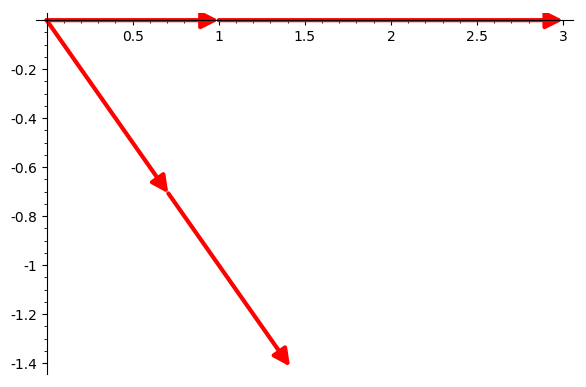

In [4]:
show_eigenvectors(A)

In [5]:
A.eigenvectors_right()

[(2, [
  (1, 0)
  ], 1), (1, [
  (1, -1)
  ], 1)]

By looking at the eigenvalues of A, we see that the lengths of $A\vec{e_i}$ is equal to it's corresponding eigenvalue $\lambda_i$.

To check that our function only plots real eigenvectors, we can apply it to a matrix with two complex eigenvectors: $ B = \begin{pmatrix}
1 & -1 \\
1 & 1 
\end{pmatrix}$. 

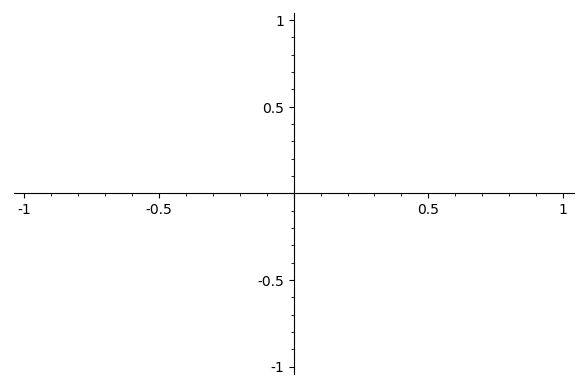

In [6]:
B=matrix(ZZ, [[1,-1],[1,1]])
show_eigenvectors(B)

As expected, neither of the eigenvectors are plotted on the Cartesian coordinate system.

## Task 3: Singular value decomposition

The third step in producing the complete eigenpicture is to compute the singular value decomposition of $A$, which identifies the vectors $\vec{s_1}$ and $\vec{s_2}$, which are subject to the most and least expansion by $A$. Our function `show_svd` then plots these singular vectors as well as the translated vectors $A\vec{s_1}$and $A\vec{s_2}$.

In [7]:
def show_svd(A):
    U, Sig, V =  A.change_ring(RDF).SVD()
    T=transpose(V)
    my_plot = plot([])
    for i in range(0,A.ncols()):
        s = T[i]
        if s in RR^2:
            arrow1 = arrow2d((0,0), s, color = 'black', width=2, arrowsize = 2)
            arrow2 = arrow2d((s), A*s + s , color = 'black', width=2, arrowsize = 2)
            my_plot = my_plot + arrow1 +arrow2
    return my_plot

Applying our function to the matrix A as above, we get the following result.

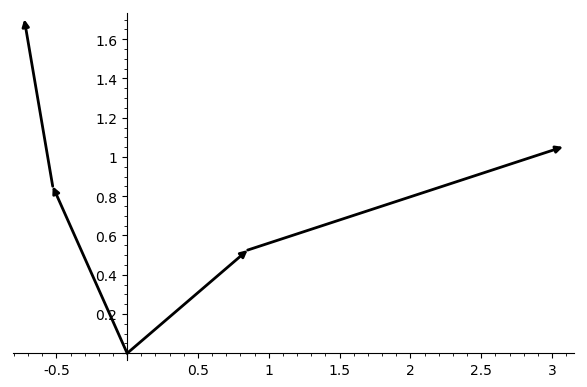

In [8]:
show_svd(A)

## Task 4: The complete eigenpicture

For any $2 \times 2$ matrix, we can use the function `eigenpicture` to join the previous plots `basic_eigenpicture`, `show_eigenvectors` and `show_svd`. We can chose which of the latter two functions to have in the plot using `include_evecs = true` and `include_svd = true`.

In [9]:
def eigenpicture(A, include_evecs, include_svd):
    eigenpicture = basic_eigenpicture(A)
    if include_evecs == true:
        eigenpicture = eigenpicture + show_eigenvectors(A)
    if include_svd == true:
        eigenpicture = eigenpicture + show_svd(A)
    return eigenpicture

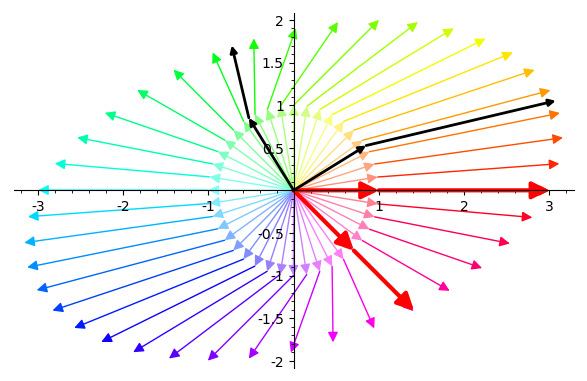

In [10]:
eigenpicture(A, include_evecs = true, include_svd = true)

As expected, the plot above shows the eigenvector arrows and the singular value decomposition arrows overlap with arrows from the basic eigenpicture. Notice the singular vectors are orthogonal to each other, which is true for all matrices.

## Further Questions: Investigating different types of matrices and their eigenpictures

### Diagonal Matrices

First, we will investigate the eigenpictures of diagonal matrices. Let's try looking at three randomly chosen diagonal matrices (with values smaller than 5 so that the eigenpicture is readable).

In [47]:
import random
D_1 = Matrix(ZZ, 2, 2, [random.randrange(0,5), 0, 0, random.randrange(0,5)])
D_2 = Matrix(ZZ, 2, 2, [random.randrange(-5,5), 0, 0, random.randrange(-5,5)])
D_3 = Matrix(ZZ, 2, 2, [random.randrange(-5,5), 0, 0, random.randrange(-5,5)])
pretty_print(D_1, ',', D_2, ',', D_3)

[1 0]
[0 2] ',' [-5  0]
[ 0 -1] ',' [-2  0]
[ 0  4]

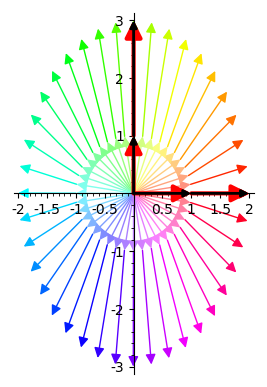

In [48]:
eigenpicture(D_1, include_evecs = true, include_svd = true)

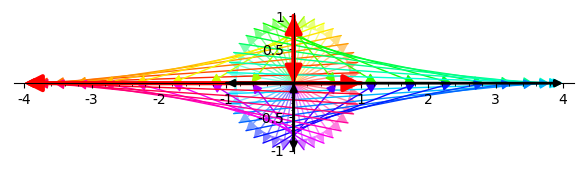

In [49]:
eigenpicture(D_2, include_evecs = true, include_svd = true)

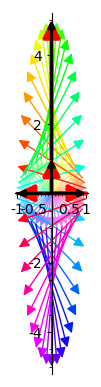

In [50]:
eigenpicture(D_3, include_evecs = true, include_svd = true)

As we can see, for diagonal matrices, both the singular vectors and the eigenvectors are equal to $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ and $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$. Additionally, the translated singular vectors and eigenvectors both always lie on the $x$ and $y$ axes.

We can easily confirm this algebraically. Let us take a diagonal matrix $ D = \begin{pmatrix}
a & 0 \\
0 & b 
\end{pmatrix}$. The characteristic polynomial of $D$ is $(a-\lambda)(b-\lambda)$ and its roots are $a$ and $b$, therefore the eigenvalues of D are $a$ and $b$. Now it is clear that the eigenvectors of D will be $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ and $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$.

The singular values of D are the square roots of the eigenvalues of $D D^T = \begin{pmatrix}
a & 0 \\
0 & b 
\end{pmatrix}$$\begin{pmatrix}
a & 0 \\
0 & b 
\end{pmatrix}$ = $ \begin{pmatrix}
a^2 & 0 \\
0 & b^2 
\end{pmatrix}$. Therefore the singular values of $D$ are again $a$ and $b$. The singular vectors are the corresponding eigenvectors to the singular values, which are again $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ and $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$.

### Jordan Matrices
As you may have noticed, the matrix A is a matrix in Jordan normal form since it is of the form $\begin{pmatrix}
\lambda_1 & 1\\
0 & \lambda_2
\end{pmatrix}$.
Let's look at another Jordan matrix.

In [15]:
J_1 = Matrix(ZZ, 2, 2, [2, 1, 0, 3])
pretty_print(J_1)

[2 1]
[0 3]

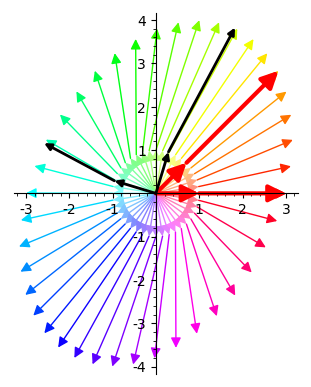

In [16]:
eigenpicture(J_1, include_evecs = true, include_svd = true)

As you can see, Jordan matrices always have an eigenvector of the form  $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ corresponding to the first eigenvalue. The reason for this is very similar to diagonal matrices.
Let's show this algebraically:
$$\begin{pmatrix}
\lambda_1 & 1\\
0 & \lambda_2
\end{pmatrix}\begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \lambda_1 \begin{pmatrix} v_1 \\ v_2 \end{pmatrix}$$
$$ \Rightarrow \begin{pmatrix} \lambda_1 v_1 +v_2 \\ \lambda_2 v_2\end{pmatrix} = \begin{pmatrix} \lambda_1 v_1 \\ \lambda_1 v_2 \end{pmatrix}$$
$$\Rightarrow \lambda_1 v_1 +v_2 = \lambda_1 v_1 $$
$$\Rightarrow v_1 = 1,  v_2 = 0$$

For a Jordan block matrix, the two eigenvalues are equal, and so only one eigenvector is found, $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$, as shown below.

In [17]:
J_2 = Matrix(ZZ, 2, 2, [2, 1, 0, 2])
pretty_print(J_2)

[2 1]
[0 2]

In [18]:
J_2.eigenvectors_right()

[(2, [
  (1, 0)
  ], 2)]

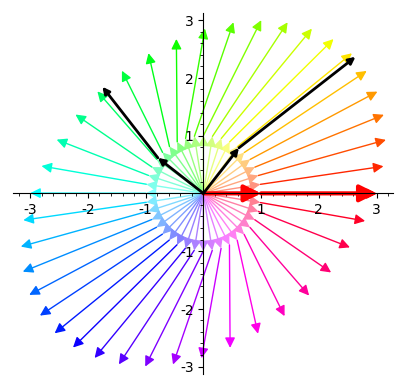

In [19]:
eigenpicture(J_2, include_evecs = true, include_svd = true)

For a Jordan block matrix, $\lambda_1 = \lambda_2$, when this is subbed into the equation, it is clear that their is only one eigenvector.

### Symmetric Matrices

Now, let us investigate symmetric matrices, which have the form $ S = \begin{pmatrix}
a & b \\
b & c 
\end{pmatrix}$. Below are some randomly chosen symmetric matrices and their eigenpictures.

In [20]:
S_1 = Matrix(ZZ, 2, 2, [random.randrange(0,5), 1, 1, random.randrange(0,5)])
S_2 = Matrix(ZZ, 2, 2, [random.randrange(-5,5), 2, 2, random.randrange(-5,5)])
S_3 = Matrix(ZZ, 2, 2, [random.randrange(-5,5), 3, 3, random.randrange(-5,5)])
pretty_print(S_1, ',', S_2, ',', S_3)

[4 1]
[1 0] ',' [ 3  2]
[ 2 -5] ',' [-4  3]
[ 3  3]

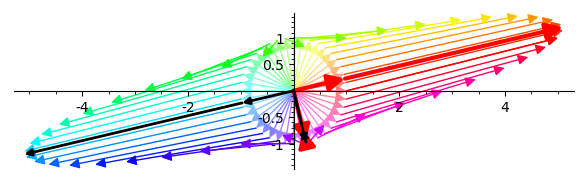

In [21]:
eigenpicture(S_1, include_evecs = true, include_svd = true)

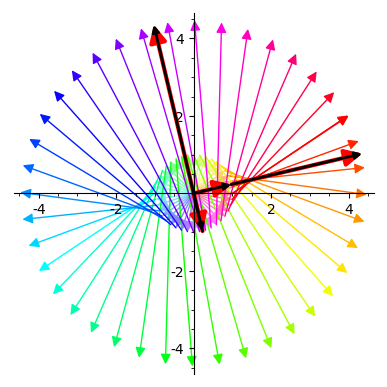

In [22]:
eigenpicture(S_2, include_evecs = true, include_svd = true)

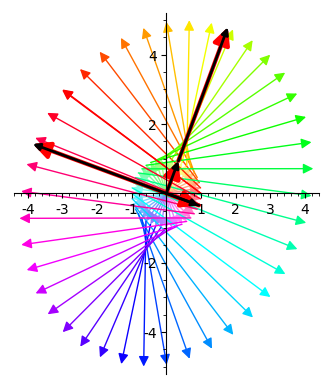

In [23]:
eigenpicture(S_3, include_evecs = true, include_svd = true)

A pattern emerges: the eigenvectors (in red) seem to point in the same or exact opposite direction as the singular vectors (in black). Additionally, when they are distinct, the eigenvectors are orthogonal to each other, as are the singular vectors. 

The fact that the eigenvectors of symmetric matrices corresponding to distinct eigenvectors are othogonal is easy to prove. For a symmetric matrix, $A=A^T$. If we have two eigenvectors $\vec{e_1}$, $\vec{e_2}$ with eigenvalues $\lambda_1$, $\lambda_2$, then we have $A\vec{e_1}=\lambda_1 \vec{e_1}$ and $A\vec{e_2}=\lambda_2 \vec{e_2}$. For distinct lambda, we want to show that the eigenvectors are distinct, i.e. that their dot product is equal to zero.

We have $\lambda_1 (\vec{e_1} . \vec{e_2}) = \lambda_1 \vec{e_1} . \vec{e_2} = A \vec{e_1} . \vec{e_2} = (A \vec{e_1})^T . \vec{e_2} = \vec{e_1}^T A^T \vec{e_2} = \vec{e_1}^T \lambda_2 \vec{e_2} = \lambda_2 \vec{e_1}^T \vec{e_2} = \lambda_2 (\vec{e_1}.\vec{e_1}).$

Therefore for distinct lambda, we have the dot produt of the eigenvectors equal to zero, and so the eigenvectors are orthogonal as is suggested by our eigenpicture.

Now we can look at the singular value decomposition. For a symmetric matrix, the singular values are in fact the absolute values of the eigenvalues.$^1$ Therefore, the singular vectors of a symmetric matrix will be the same as or pointing in the exact opposite direction as the eigenvectors, as we discovered when looking at the eigenpictures. Since the singular values are equal to the absolute value of the eigenvalues, and as we showed the eigenvectors corresponding to these eigenvalues are orthogonal, it will follow that the singular vectors are also orthogonal to each other. This agrees with what our eigenpictures showed.

### Invertible Matrices

We shall now investigate invertible matrices, which have the form $ A = \begin{pmatrix}
a & b\\
c & d
\end{pmatrix}$. An example of an eigenpicture of matrix of this form and it's inverse is shown below.

In [24]:
I_1=A.inverse()              #Use sage's in-built function to get the inverse of A
pretty_print( A, ',', I_1)

[2 1]
[0 1] ',' [ 1/2 -1/2]
[   0    1]

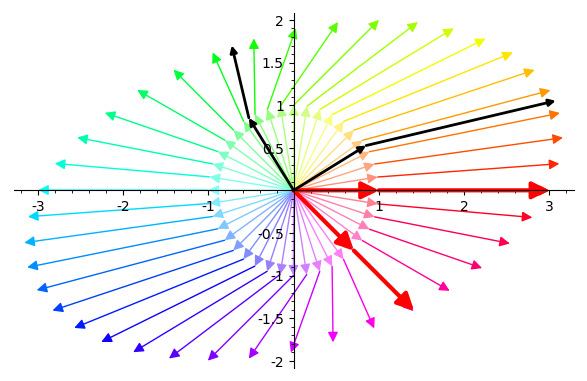

In [25]:
eigenpicture(A, include_evecs = true, include_svd = true)

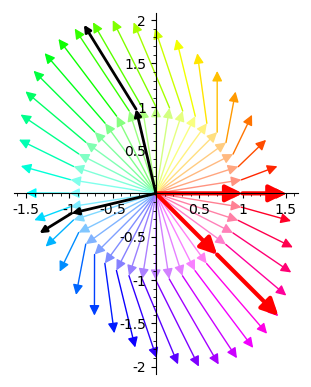

In [26]:
eigenpicture(I_1, include_evecs = true, include_svd = true)

In [27]:
A_2=Matrix(ZZ, 2, 2, [random.randrange(0,5), 1, 2, random.randrange(1,5)])
I_2=A_2.inverse()
pretty_print(A_2, ',', I_2)

[1 1]
[2 1] ',' [-1  1]
[ 2 -1]

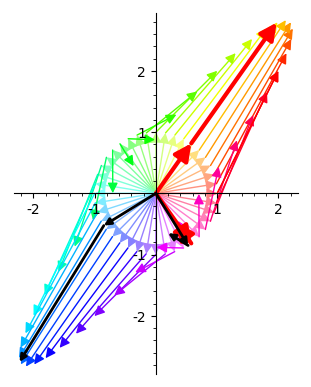

In [28]:
eigenpicture(A_2, include_evecs = true, include_svd = true)

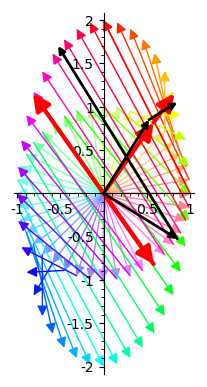

In [29]:
eigenpicture(I_2, include_evecs = true, include_svd = true)

As we can see from the eigenpictures, the eigenvectors of the original matrix and the inverse, point in the same direction. However, the singular vectors don't seem to follow any pattern.

We can investigate this algebraically. Let us take a matrix $ A= \begin{pmatrix}
a & b\\
c & d 
\end{pmatrix}$. The characteristic polynomial of $A$ is $(a-\lambda)(d-\lambda)-bc $ and its $eigenvalues$ are $\lambda_1$ and $\lambda_2$, given by:
$$ \lambda = \frac{(a+d) \pm \sqrt{(a+d)^2-4(ad-bc)}}{2}.$$
The inverse of $A$ will be $ A^{-1}= \frac{1}{ad-bc}\begin{pmatrix}
d & -b\\
-c & a
\end{pmatrix}$. The $eigenvalues$ of the inverse matrix will be given by $\frac{1}{\lambda_1}$ and $\frac{1}{\lambda_2}.$ 

By definition, we have $A \boldsymbol{v}=\lambda \boldsymbol{v}$. Multiplying it by $A^{-1}$ from the left, we have $\boldsymbol{v}=\lambda A^{-1}\boldsymbol{v}.$ Dividing through by $\lambda$, we get:

$A^{-1}\boldsymbol{v}=\frac{1}{\lambda}\boldsymbol{v}$.


This shows that the $eigenvectors$ for both $A$ and $A^{-1}$ are the same, $v_1$ and $v_2$, which is what we can see from the pictures.


The singular values of $A^{-1}$ are the square roots of the $eigenvalues$ of $\big{(}A^{-1}\big{)}^TA^{-1}$. 

$\big{(}A^{-1}\big{)}^TA^{-1} = \big{(}\frac{1}{ad-bc}\big{)}^2\begin{pmatrix}
d & -c\\
-b & a
\end{pmatrix}$
$\begin{pmatrix}
d & -b \\
-c & a 
\end{pmatrix}$ = $ \big{(}\frac{1}{ad-bc}\big{)}^2 \begin{pmatrix}
d^2+c^2& -bd-ca \\
-bd-ca & b^2+a^2 
\end{pmatrix}$.

Therefore the singular values of $A^{-1}$ are given by:
$$\sqrt{\lambda}=\sqrt{ \bigg{(}\frac{1}{ad-bc}\bigg{)}^2\bigg{(}\frac{(d^2+c^2)(b^2+a^2) \pm \sqrt{((d^2+c^2)(a^2+b^2)^2)-4(ad-cb)^2}}{2}\bigg{)}}$$ The singular vectors are the corresponding eigenvectors to the singular values.
These vectors differ from those obtained for the original matrix. This is also shown in the pictures above.

Looking at the eigenpictures, it however looks like the angle between the translated singular vectors of $A$ is the same as the angle between the translated singular vectors of $A^{-1}$. Let's write some code to confirm this.

In [30]:
def angles(A):
    U, Sig, V =  A.change_ring(RDF).SVD()
    T=transpose(V)
    my_plot = plot([])
    for i in range(0,A.ncols()):
        s = T[i]
        if s in RR^2:
            a = s
            b = A*s
            dotproduct = a.dot_product(b)
            myfraction = dotproduct/(norm(a) * norm(b))
            return round(arccos(myfraction).n(),8)

In [31]:
angles(A) == angles(I_1)

True

In [32]:
angles(A_2) == angles(I_2)

False

Our intuition was correct - the angles formed between the singular vectors of a matrix and their translation by that matrix for the matrix and it's inverse were in fact the same for both randomly chosen matrices. 

## Other interesting features of Eigenpictures

### The formations of the points $\vec{v} + A\vec{v}$

As seen on all the above graphs, the majority of the time the graphs form an ellipse.

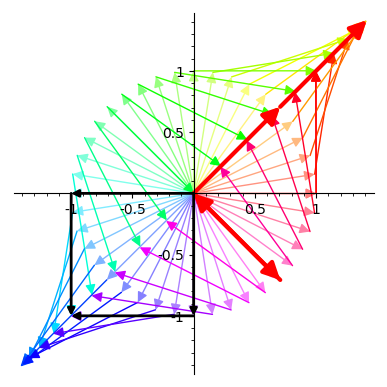

In [33]:
B_1 =matrix(ZZ, [[0,1],[1,0]])
eigenpicture(B_1, include_evecs = true, include_svd = true)

In [34]:
B_1.eigenvectors_right()

[(1, [
  (1, 1)
  ], 1), (-1, [
  (1, -1)
  ], 1)]

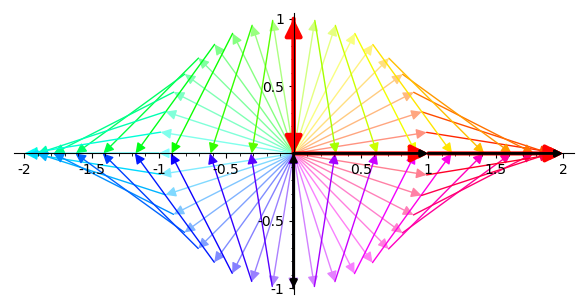

In [35]:
B_2=matrix(ZZ, [[1,0],[0,-1]])
eigenpicture(B_2, include_evecs = true, include_svd = true)

In [36]:
B_2.eigenvectors_right()

[(1, [
  (1, 0)
  ], 1), (-1, [
  (0, 1)
  ], 1)]

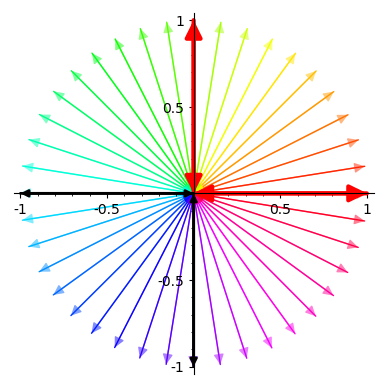

In [37]:
B_3=matrix(ZZ, [[-1,0],[0,-1]])
eigenpicture(B_3, include_evecs = true, include_svd = true)

In [38]:
B_3.eigenvectors_right()

[(-1, [
  (1, 0),
  (0, 1)
  ], 2)]

These are examples of when $\vec{v} + A\vec{v}$ does not form an ellipse.

When there is an eigenvalue of -1, then it forms a line. This is because $A\vec{v}$ is equal length but opposite direction to the eigenvector, so maps to the point (0,0). An ellipse centered at (0,0) cannot go through the point (0,0), so it must go to a line.

When there is 2 eigenvalues of -1, then both eigenvectors are the opposite of $A\vec{v} $ so end at the origin. A straight line cannot have 2 points that are at the origin, therefore it must be a point at the origin.

## Bibliography

1 : Notes on Singular Value Decomposition (Online) University of California, Berkley. Accessed via: https://math.berkeley.edu/~hutching/teach/54-2017/svd-notes.pdf

2 : Eigenpictures and Singular Values of a Matrix. Zizler, P. & Frase, H., 1997, The College Mathematics Journal, 28(1), pp.59–62.

3 : Honours Algebra.[Notes]. Gordon, I. , Gratwick, R., Hering, M., Nemes, G. & Ranicki, A., 2018-2019, The University of Edinburgh. [Accessed: 04.04.2020]